## Observations and Insights 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
#import linregress as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Mouse_Data_Results_df = pd.merge(mouse_metadata,study_results, 
                                 how = 'inner',  on='Mouse ID')
# Display the data table for preview
Mouse_Data_Results_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Checking the number of mice.
Mouse_Data_Results_df["Mouse ID"].nunique()


249

In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseID = Mouse_Data_Results_df.loc[Mouse_Data_Results_df.duplicated(["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mouseID

array(['g989'], dtype=object)

In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseID_data = Mouse_Data_Results_df.loc[Mouse_Data_Results_df['Mouse ID']=='g989']

duplicate_mouseID_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Mouse_Data_Results_df.drop_duplicates(duplicate_mouse)
clean_data = Mouse_Data_Results_df.loc[Mouse_Data_Results_df['Mouse ID'] != 'g989']
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [33]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].nunique()


248

## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_grouped = clean_data.groupby(["Drug Regimen"])
regimen_grouped

regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()



In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

sum_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
sum_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [35]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_regimen = clean_data.groupby(['Drug Regimen']).count()['Mouse ID']
mouse_regimen

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

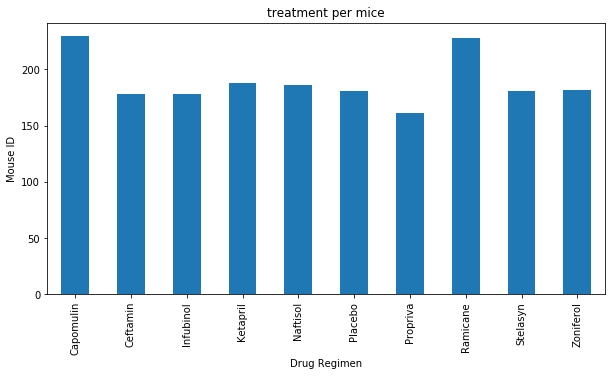

<Figure size 432x288 with 0 Axes>

In [58]:
mouse_regimen.plot(kind="bar", figsize=(10,5))

#set chart title
plt.title("treatment per mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse ID")

#show chart and set layout
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Mouse ID')

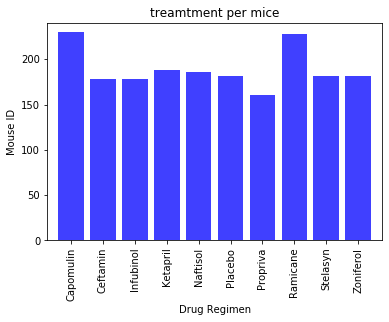

In [59]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#Create an arraw with the datapoints
mice = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(mouse_regimen))

plt.bar(x_axis, mice, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice)+10)

plt.title("treatment per mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse ID")


In [45]:
#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
groupby_gender = clean_data.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(clean_data.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#gender_df
mouse_gender



ValueError: Length mismatch: Expected axis has 7 elements, new values have 1 elements

(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

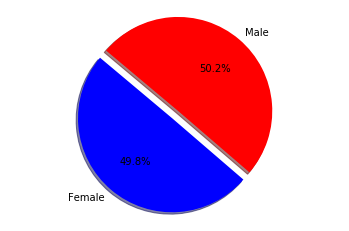

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['blue', 'red']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

regimen_final = clean_data[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
regimen_final = regimen_final.sort_values(["Timepoint"], ascending=True)
regimen_final

regimen_time_data = regimen_final[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

regimen_time_data



,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [54]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset  
    # Determine outliers using upper and lower bounds
drug_Regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_Vol_Data = []

for name in drug_Regimen: 
    volume_data = clean_data.loc[clean_data["Drug Regimen"]== name, 'Tumor Volume (mm3)']
    tumor_Vol_Data.append(volume_data)
    
    quart= volume_data.quantile([.25, .5, .75])
    lower_q = quart[0.25]
    upper_q = quart[0.75]
    IQR = upper_q-lower_q
    
    lower_bound = lower_q - (1.5*IQR)
    upper_bound = upper_q + (1.5*IQR)
    outliers = volume_data.loc[(volume_data < lower_bound) | (volume_data > upper_bound)]
    print("-------------------------------")
    print(f"the {name} outliers are:{outliers}")
    

  

-------------------------------
the Capomulin outliers are:18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
-------------------------------
the Ramicane outliers are:9    22.050126
Name: Tumor Volume (mm3), dtype: float64
-------------------------------
the Infubinol outliers are:Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------------
the Ceftamin outliers are:Series([], Name: Tumor Volume (mm3), dtype: float64)


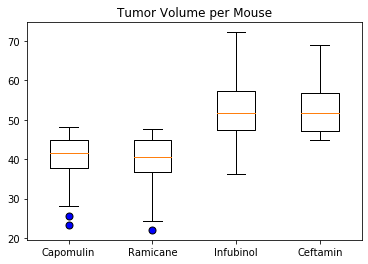

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_Vol_Data, labels=drug_Regimen, flierprops={'markerfacecolor':'blue', 'markersize':7})
plt.title('Tumor Volume per Mouse')
plt.show()


## Line and Scatter Plots

In [57]:
plot_line_df = clean_data.loc[clean_data['Mouse ID'] == 'i738']
plot_line_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
195,i738,Capomulin,Female,23,20,0,45.000000,0
196,i738,Capomulin,Female,23,20,5,45.595685,0
197,i738,Capomulin,Female,23,20,10,43.421014,0
198,i738,Capomulin,Female,23,20,15,37.978778,0
199,i738,Capomulin,Female,23,20,20,38.531136,0


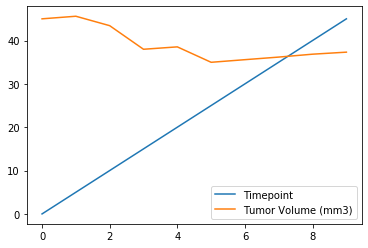

In [60]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vs_tumor = clean_data[clean_data["Mouse ID"].isin(["i738"])]
time_vs_tumor

time_vs_tumor_data = time_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumor_data

line_plot_df = time_vs_tumor_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()

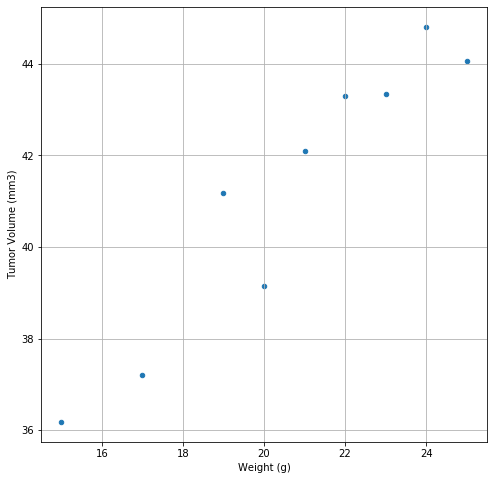

In [56]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumor_volume_list = line_plot_final['Tumor Volume (mm3)'].tolist()
timepoint_list = line_plot_final['Timepoint'].tolist()


capomulin_scatter = clean_data[clean_data["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = regimen_final[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_sorted = capomulin_scatter_df.sort_values(["Weight (g)"], ascending=True)

capomulin_scatter_plot = capomulin_scatter.reset_index()

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

Capomulin_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()


#capomulin_scatter = capomulin_grouped_weight.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
#
capomulin_scatter = Capomulin_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))
#capomulin_scatter


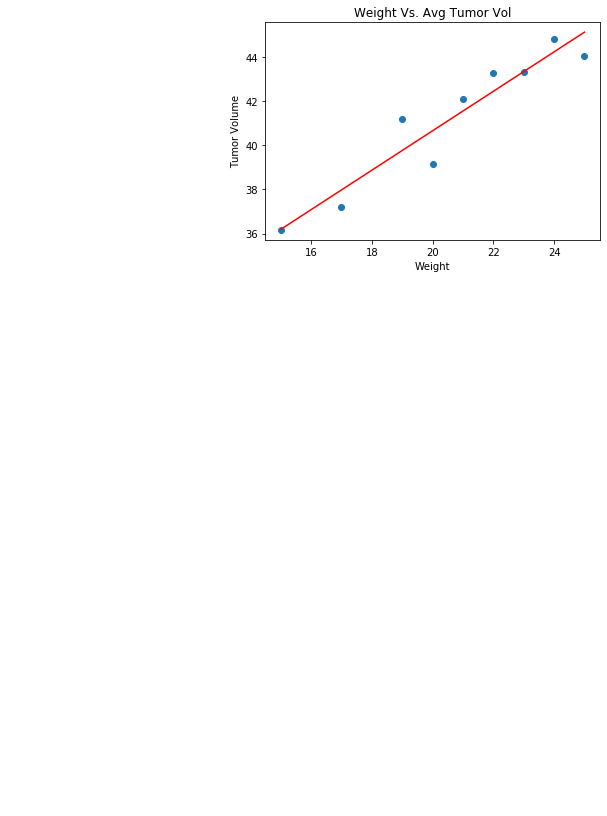

In [74]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = Capomulin_grouped_plot["Weight (g)"]
y_values = Capomulin_grouped_plot["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()

## Correlation and Regression